# Week 11: Complexity and Performance

## POP77001 Computer Programming for Social Scientists

### Tom Paskhalis

##### 22 November 2021

##### Module website: [bit.ly/POP77001](https://bit.ly/POP77001)

## Overview

- Algorithms
- Computational complexity
- Big-O notation
- Code optimisation
- Benchmarking

## Algorithm

- *Finite list of well-defined instructions that take input and produce output.*

- Consists of a sequence of simple steps that start from input, follow some control flow and have a stopping rule.

## Complexity

- *Conceptual complexity*
    - Structural sophistication of a program
- *Computational complexity*
    - Resources (time/space) required to finish a program
- Often there is some trade-off between the two
- Reducing computational complexity results in increased conceptual complexity

## How long does a program take to run?

In [1]:
# Linear search using exhaustive enumeration
linear_search <- function(v, x) {
  n <- length(v)
  for (i in seq_len(n)) {
    if (v[i] == x) {
      return(TRUE)
    }
  }
  return(FALSE)
}

## Benchmarking

In [2]:
# Best case (running time is independent of the length of vector)
system.time(linear_search(1:1e6, 1))

   user  system elapsed 
  0.003   0.000   0.003 

In [3]:
# Average case (middle element for vector of length 1M)
system.time(linear_search(1:1e6, 5e5))

   user  system elapsed 
  0.016   0.000   0.017 

In [4]:
# Worst case (for vector of length 1M)
system.time(linear_search(1:1e6, 1e6))

   user  system elapsed 
  0.033   0.000   0.033 

In [5]:
# Even worse case (for vector of length 1B)
system.time(linear_search(1:1e9, 1e9))

   user  system elapsed 
 31.628   0.000  31.633 

## Limitations of benchmarking

- Depends on many factors:
    - Computer hardware
    - Input size
    - Programming language used
- Which of the benchmarking cases is the most useful?

## Worst-case scenario

> Anything that can go wrong will go wrong.  
>    
> Edward Murphy

- In *defensive design* it is often helpful to think about the worst-case scenario
- Which sets an *upper bound* on the execution time of a program
- However, this still depends on the input size

## Number of steps

- A useful heuristic is the number of steps that a program takes

In [6]:
linear_search <- function(v, x) {
  n <- length(v) # 2 steps (call to length() function and assignment `<-`)
  # n steps + 1 step (for seq_len(n) call)
  for (i in seq_len(n)) {
    # 3n steps (n steps for `[`(v, i), another n steps for `==` and n calls to `if`)
    if (v[i] == x) {
      return(TRUE) # 1 step
    }
  }
  return(FALSE) # 1 step
}

- $4n + 4$
- Or, if length of input vector $v$ is $1000$ ($n = 1000$)
- This function will execute roughly $4004$ steps 

## Calculating number of steps

- Consider the previous example: $4n + 2$
- As $n$ grows larger, these extra $2$ steps can be ignored
- Multiplicative constants can certainly make a difference within implementation
- But across several algorithms the difference between $2n$ and $4n$ is usually negligible 

## Big-O notation

- Performance on small inputs and in best-case scenarios is usually of limited interest
- What matters is the worst-case performance on progressively larger inputs
- In other words, *upper bound* (or *order of growth*)
- Big O (**O**rder of growth) is an *asymptotic notation* for describing such growth
- For example, in case of linear search $O(n)$ (running time increases linearly in the size of input)
- The most important question is the growth rate of the largest term
- All constants can be ignored 

## Alternative algorithms

In [7]:
# Binary search for sorted sequences
binary_search <- function(v, x) {
  low <- 1
  high <- length(v)
  while (low <= high) {
    # Calculate mid-point (similar to median)
    m <- (low + high) %/% 2
    if (v[m] < x) {
      low <- m + 1
    } else if (v[m] > x) {
      high <- m - 1
    } else {
      return(TRUE)
    }
  }
  return(FALSE)
}

## Comparing algorithms

In [8]:
system.time(linear_search(1:1e6, 1e6))

   user  system elapsed 
  0.035   0.000   0.036 

In [9]:
system.time(binary_search(1:1e6, 1e6))

   user  system elapsed 
  0.005   0.000   0.005 

In [10]:
system.time(1e6 %in% 1:1e6)

   user  system elapsed 
  0.001   0.004   0.004 

## Comparing algorithms continued

In [11]:
linear_search <- function(v, x) {
  n <- length(v)
  for (i in seq_len(n)) {
    if (v[i] == x) {
      print(paste0("Number of iterations: ", as.character(i)))
      return(i) # return(TRUE)
    }
  }
  return(i) # return(FALSE)
}

In [12]:
binary_search <- function(v, x) {
  low <- 1
  high <- length(v)
  iters <- 1
  while (low <= high) {
    m <- (low + high) %/% 2
    if (v[m] < x) {
      low <- m + 1
    } else if (v[m] > x) {
      high <- m - 1
    } else {
      print(paste0("Number of iterations: ", as.character(iters)))
      return(iters) # return(TRUE)
    }
    iters <- iters + 1
  }
  return(iters) # return(FALSE)
}

In [13]:
ls_1e3 <- linear_search(1:1e3, 1e3)
ls_1e6 <- linear_search(1:1e6, 1e6)

[1] "Number of iterations: 1000"
[1] "Number of iterations: 1000000"


In [14]:
bs_1e3 <- binary_search(1:1e3, 1e3)
bs_1e6 <- binary_search(1:1e6, 1e6)

[1] "Number of iterations: 10"
[1] "Number of iterations: 20"


## Important computational complexity cases

| Big-O notation   | Running time   |
|:-----------------|:---------------|
| $O(1)$           | constant       |
| $O(\log n)$      | logarithmic    |
| $O(n)$           | linear         |
| $O(n \log n)$    | log-linear     |
| $O(n^c)$         | polynomial     |
| $O(c^n)$         | exponential    |
| $O(n!)$          | factorial      |

## Constant complexity: $O(1)$

- Running time of a program is bounded by a value, which is independent of the input size

In [15]:
get_len <- function(v) {
    # Internally, length just returns the 'length' attribute of an R object
    n <- length(v)
    return(n)
}

In [16]:
system.time(get_len(1:1e3))

   user  system elapsed 
      0       0       0 

In [17]:
system.time(get_len(1:1e6))

   user  system elapsed 
  0.001   0.000   0.001 

In [18]:
system.time(get_len(1:1e9))

   user  system elapsed 
      0       0       0 

## Logarithmic complexity: $O(\log n)$

- E.g. for binary search $O(\log(n))$ (running time increases as a logarithm of the input size)
- Base of logarithm is irrelevant as it can be easily re-arranged $\log_2(n) = \log_2(10) \times \log_{10}(n)$ and constants are ignored
- For base $2$ we can say that each time the size of input doubles, the algorithm performs one additional step

In [19]:
bs_10 <- binary_search(1:10, 10)
bs_20 <- binary_search(1:20, 20)
bs_100 <- binary_search(1:100, 100)
bs_200 <- binary_search(1:200, 200)
bs_1000 <- binary_search(1:1000, 1000)

[1] "Number of iterations: 4"
[1] "Number of iterations: 5"
[1] "Number of iterations: 7"
[1] "Number of iterations: 8"
[1] "Number of iterations: 10"


## Linear complexity: $O(n)$

- For linear search $O((n))$ (running time increases as a linear function of the input size)
- Generally, iteration over all elements of a sequence would be in $O(n)$
- But it doesn't have to be a loop (e.g. recursive factorial implementation)

In [20]:
ls_10 <- linear_search(1:10, 10)
ls_20 <- linear_search(1:20, 20)
ls_100 <- linear_search(1:100, 100)
ls_200 <- linear_search(1:200, 200)
ls_1000 <- linear_search(1:1000, 1000)

[1] "Number of iterations: 10"
[1] "Number of iterations: 20"
[1] "Number of iterations: 100"
[1] "Number of iterations: 200"
[1] "Number of iterations: 1000"


## Graphic comparison of time complexity: $O(1)$, $O(\log n)$, $O(n)$

In [21]:
x <- c(10, 20, 100, 200, 1000)
constant_complexity <- rep(10, length(x))
log_complexity <- c(bs_10, bs_20, bs_100, bs_200, bs_1000)
linear_complexity <- c(ls_10, ls_20, ls_100, ls_200, ls_1000)

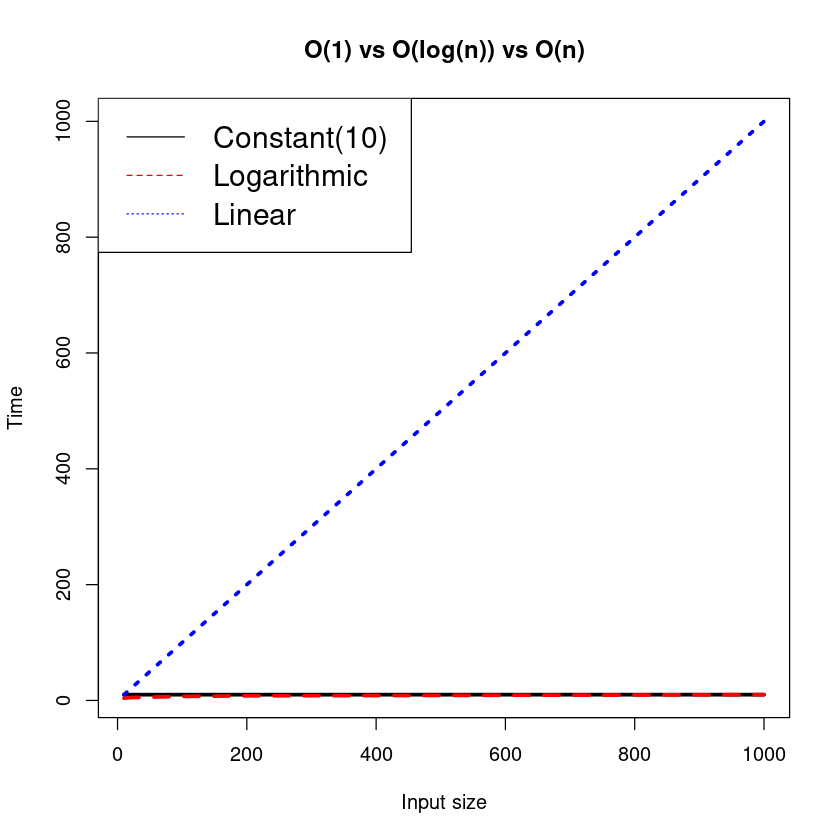

In [22]:
plot(x, linear_complexity, type = "n", main = "O(1) vs O(log(n)) vs O(n)", xlab = "Input size", ylab = "Time")
lines(x, constant_complexity, type = "l", col = "black", lty = 1, lwd = 3)
lines(x, log_complexity, type = "l", col = "red", lty = 2, lwd = 3)
lines(x, linear_complexity, type = "l", col = "blue", lty = 3, lwd = 3)
legend("topleft", legend = c("Constant(10)", "Logarithmic", "Linear"),
       col = c("black", "red", "blue"), lty = 1:3, cex = 1.5)

## Log-Linear complexity: $O(n \log n)$

- More complicated complexity case
- Involves a product of 2 terms
- Important complexity case as many practical problems are solved in log-linear time
- Many sorting algorithms (e.g. merge sort, timsort, built-in `sorted()` in Python)

## Polynomial complexity: $O(n^c)$

- Most common case is quadratic complexity: $O(n^2)$
- Nested loops typically result in polynomial complexity

In [23]:
# Check whether one vector is contained within another vector
is_subset <- function(v1, v2) {
  n <- length(v1)
  m <- length(v2)
  iters <- 1
  for (i in seq_len(n)) {
    matched <- FALSE
    for (j in seq_len(m)) {
      iters <- iters + 1
      if (v1[i] == v2[j]) {
        matched <- TRUE
        break
      }
    }
    if (isTRUE(matched)) {
      print(paste0("Number of iterations: ", as.character(iters)))
      return(iters) # return(TRUE)
    }
  }
  print(paste0("Number of iterations: ", as.character(iters)))
  return(iters) # return(FALSE)
}

In [24]:
# For simplicity of analysis let's assume that
# lengths of 2 input vectors are about the same
is_10 <- is_subset(11:21, 1:10)
is_20 <- is_subset(21:41, 1:20)
is_100 <- is_subset(101:201, 1:100)
is_200 <- is_subset(201:401, 1:200)
is_1000 <- is_subset(1001:2001, 1:1000)

[1] "Number of iterations: 111"
[1] "Number of iterations: 421"
[1] "Number of iterations: 10101"
[1] "Number of iterations: 40201"
[1] "Number of iterations: 1001001"


## Graphic comparison: $O(n)$, $O(n \log n)$, $O(n^2)$

In [25]:
log_linear_complexity <- x * log(x)
quadratic_complexity <- c(is_10, is_20, is_100, is_200, is_1000)

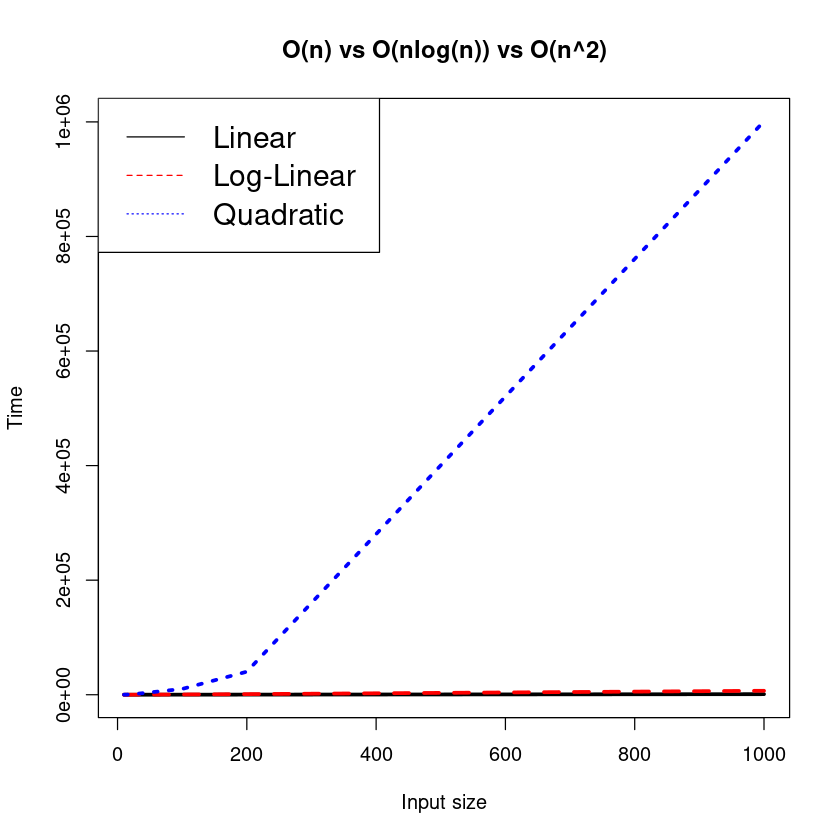

In [26]:
plot(x, quadratic_complexity, type = "n", main = "O(n) vs O(nlog(n)) vs O(n^2)", xlab = "Input size", ylab = "Time")
lines(x, linear_complexity, type = "l", col = "black", lty = 1, lwd = 3)
lines(x, log_linear_complexity, type = "l", col = "red", lty = 2, lwd = 3)
lines(x, quadratic_complexity, type = "l", col = "blue", lty = 3, lwd = 3)
legend("topleft", legend = c("Linear", "Log-Linear", "Quadratic"),
       col = c("black", "red", "blue"), lty = 1:3, cex = 1.5)

## Exponential and factorial complexity: $O(c^n)$ and $O(n!)$

- Many real-life problems have exponential or factorial solutions
- E.g. [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) (given the list of points and distances, what is the shortest path through all of them)
- However, the general solutions with such complexity are usually impractical
- For these problems either approximate solutions can be used
- Or a problem is solved for specific cases

## Graphic comparison: $O(n^2)$, $O(10^n)$, $O(n!)$

In [27]:
x <- 1:25
quadratic_complexity <- x ^ 2
exponential_complexity <- 10 ^ x
factorial_complexity <- factorial(x)

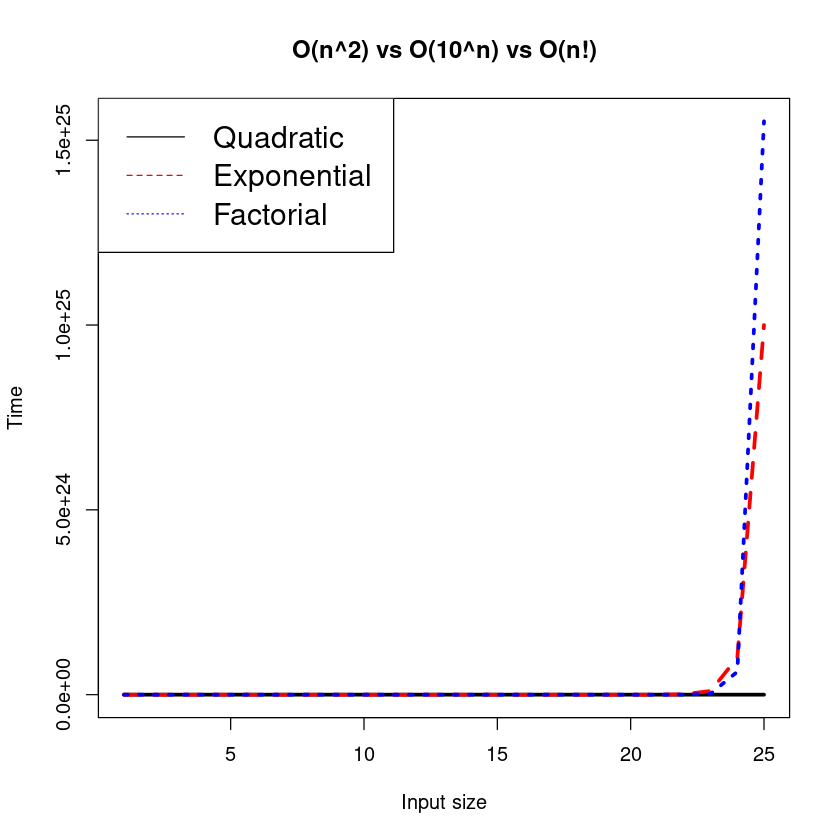

In [28]:
plot(x, factorial_complexity, type = "n", main = "O(n^2) vs O(10^n) vs O(n!)", xlab = "Input size", ylab = "Time")
lines(x, quadratic_complexity, type = "l", col = "black", lty = 1, lwd = 3)
lines(x, exponential_complexity, type = "l", col = "red", lty = 2, lwd = 3)
lines(x, factorial_complexity, type = "l", col = "blue", lty = 3, lwd = 3)
legend("topleft", legend = c("Quadratic", "Exponential", "Factorial"),
       col = c("black", "red", "blue"), lty = 1:3, cex = 1.5)

## Time complexity in practice

- Check for loops, recursion
- Think about function calls, what is the complexity of underlying implementations
- The presented complexity cases are not exhaustive and are often 'idealised' cases
- Complexity can take any form (e.g. one of `sort()` methods in R is $O(n^{4/3})$)
- Running time can be a function of more than one input (e.g. `is_subset()` function above)
- Big-O ignores constants (multiplicative and additive), but they matter within implementation
- There is a tradeoff between conceptual and computational complexity (more efficient solutions are often harder to read and debug)

## Benchmarking and profiling

- Built-in function `system.time()` provides basic benchmarking functionality 
- One problem is it runs each code snippet once, which can be sensitive to other factors
- Check `microbenchmark` for more advanced features (e.g. averaging over many runs)
- *Profiling* allows more granular instruction-specific timing
- RStudio has a built-in profiling functionality (through `profvis` package)

Extra: [Profiling code with RStudio IDE](https://support.rstudio.com/hc/en-us/articles/218221837-Profiling-R-code-with-the-RStudio-IDE)

## Code optimisation in R

- Find the biggest bottlenecks (parts of code that take most time to evaluate)
- Look for existing solutions to your problem (including built-in R functions)
- Avoid unnecessary copying
- Vectorise your code (more below)
- Parallelise your code
- Do not start optimising prematurely

## Code optimisation tradeoff

<div style="text-align: center;">
    <img width="500" height="500" src="../imgs/xkcd_1205.png">
</div>

Source: [xkcd](https://xkcd.com/1205/)

## Vectorised operations in R

- Many operations in R are *vectorized*
- They take vectors as input and produce vectors as output
- This is not just convenient, but often speeds up your code
- It eliminates extra function calls by relying on built-in routines
- Many base R functions are implemented in fast compiled C/Fortran code

## Vectorised operations in R example

In [29]:
# 1M can also be written as 1e6 in scientific notation (see above)
# We draw a random sample of 1M elements from a uniform distribution
# With min = 0 and max = 1
x <- runif(1000000)
y <- runif(1000000)
# And a vector for storing the results
z <- vector("double", length = 1000000)

In [30]:
# Using built-in vectorized summation with `+` operator
system.time(z <- x + y)

   user  system elapsed 
  0.003   0.000   0.003 

In [31]:
# Using an excplicit loop for summing up individual elements
system.time(for (i in seq_along(x)) z[i] <- x[i] + y[i])

   user  system elapsed 
  0.054   0.000   0.054 

## Vectorised functions in R

- All core arithmetic operators are vectorized (`+`, `-`, `*`, `^`, `/`, `%/%`, `%%`)
- Relational operators (`==`, `!=`, `>`, `>=`, `<`, `<=`)
- Matrix/data.frame summaries (`rowSums()`, `colSums()`, `rowMeans()`, `colMeans()`)
- Some functionals (particularly, `lapply()`)
- Some other functions for common operations (e.g. `ifelse()` , `which()`, `cumsum()`)

## Next

- Tutorial: Benchmarking, analysis of function complexity and performance
- Assignment 5: Due at 11:00 on Monday, 29th November (submission on Blackboard)
- Next week: Web scraping